In [1]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
import pandas as pd

In [2]:
df = pd.read_csv("../Datos tratados/Datos_con_ECFP.csv")

In [3]:
X = df.drop(columns=["MorganFP", "SMILES","BBB+/BBB-", "group"])
y = df["BBB+/BBB-"]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
pipe = Pipeline([
    ('pca', PCA()),
    ('AB', AdaBoostClassifier())
])

In [6]:
param_grid = {
    'pca__n_components': [314],  # Ejemplo de opciones para el número de componentes en PCA
    'AB__learning_rate': [0.01, 0.1, 0.5, 1.0],
    'AB__n_estimators': [50, 100, 200],
}

In [7]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, scoring='accuracy', verbose=2)

In [8]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END AB__learning_rate=0.01, AB__n_estimators=50, pca__n_components=314; total time=  20.2s
[CV] END AB__learning_rate=0.01, AB__n_estimators=50, pca__n_components=314; total time=  13.4s
[CV] END AB__learning_rate=0.01, AB__n_estimators=50, pca__n_components=314; total time=  12.5s
[CV] END AB__learning_rate=0.01, AB__n_estimators=50, pca__n_components=314; total time=  13.2s
[CV] END AB__learning_rate=0.01, AB__n_estimators=50, pca__n_components=314; total time=  12.6s
[CV] END AB__learning_rate=0.01, AB__n_estimators=100, pca__n_components=314; total time=  25.4s
[CV] END AB__learning_rate=0.01, AB__n_estimators=100, pca__n_components=314; total time=  24.8s
[CV] END AB__learning_rate=0.01, AB__n_estimators=100, pca__n_components=314; total time=  24.8s
[CV] END AB__learning_rate=0.01, AB__n_estimators=100, pca__n_components=314; total time=  24.8s
[CV] END AB__learning_rate=0.01, AB__n_estimators=100, pca__n_component

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()),
                                       ('AB', AdaBoostClassifier())]),
             param_grid={'AB__learning_rate': [0.01, 0.1, 0.5, 1.0],
                         'AB__n_estimators': [50, 100, 200],
                         'pca__n_components': [314]},
             scoring='accuracy', verbose=2)

In [9]:
grid_search.best_params_

{'AB__learning_rate': 0.5, 'AB__n_estimators': 200, 'pca__n_components': 314}

In [10]:
grid_search.best_score_

0.844195356285028

# Entrenamiento con los datos de prueba
<hr>

In [13]:
pipe = Pipeline([
    ('pca', PCA(n_components=314)),
    ('AB', AdaBoostClassifier(learning_rate=0.5, n_estimators=20))
])

In [14]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=314)),
                ('AB', AdaBoostClassifier(learning_rate=0.5, n_estimators=20))])

# Resultados del modelo
<hr>

In [15]:
y_predicha = pipe.predict(X_test)

In [16]:
#Calcular estadísticos
accuracy = accuracy_score(y_test, y_predicha)
recall = recall_score(y_test, y_predicha, average='weighted')
precision = precision_score(y_test, y_predicha, average='weighted')
f1 = f1_score(y_test, y_predicha, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.8
Recall 0.8
precision 0.811
f1 0.785


In [17]:
y_entrenamiento = pipe.predict(X_train)

In [18]:
accuracy = accuracy_score(y_train, y_entrenamiento)
recall = recall_score(y_train, y_entrenamiento, average='weighted')
precision = precision_score(y_entrenamiento, y_entrenamiento, average='weighted')
f1 = f1_score(y_train, y_entrenamiento, average='weighted')
print("Accuracy", round(accuracy, 3))
print("Recall", round(recall, 3))
print("precision", round(precision,3))
print("f1", round(f1,3))

Accuracy 0.802
Recall 0.802
precision 1.0
f1 0.789


# Confusion Matrix
<hr>

In [19]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [20]:
mat = confusion_matrix(y_predicha, y_test)

<Axes: >

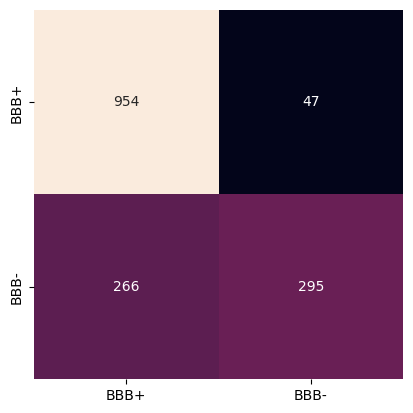

In [21]:
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar = False, xticklabels=df["BBB+/BBB-"].value_counts().index, yticklabels=df["BBB+/BBB-"].value_counts().index)

# Guardar modelo
<hr>

In [22]:
import joblib

In [23]:
joblib.dump(pipe, '../Guardado de modelos/modelo_AB.joblib')

['../Guardado de modelos/modelo_AB.joblib']